# <b>RQ 6: To what extent can knowledge of a word's form predict its meaning and how can this relationship inform our understanding of language learning strategies?</b>

<u>Method</u>: For an unknown word, take the average of the vectors of the <i>n</i> words that are closest to it in form and compare the obtained vector to the actual one representing the unknown word.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import preprocess_funcs
import distance_funcs

In [2]:
os.chdir("c:/Users/Raya/OneDrive/Documents/3-CSAI/CSAI-Y3-S2/Thesis/Replication")

In [3]:
# Load words and their meaning vectors.
# Define a function to calculate the average vector of n words closest to a given word in form.
# Select unknown word.
# Calculate the average vector of the n words that are closest to it in form.
# Calculate cosine similarity between the obtained average vector and the actual meaning vector of the unknown word.

In [4]:
# Load words and their meaning vectors
full_vocab = preprocess_funcs.load_vocabulary()
filtered_vocab = preprocess_funcs.filter_vocab_by_wordlength(full_vocab)
vocab = filtered_vocab

words = list(vocab.values())
embeddings_dict = preprocess_funcs.get_vocabulary_embeddings_dict(vocab)
vectors = np.array([embeddings_dict[id] for id in vocab.keys()])

In [5]:
# Define functions to calculate the average vector of the n words closest to a given word in form

def get_nearest_form_neighbors(target_id, vocab, n=5): 
    target_word = vocab[target_id]
    
    # Filter the vovabulary to exclude the target word.
    vocab_no_target = vocab.copy()
    del vocab_no_target[target_id]
    
    # Compute the form distance of the target word to all other words
    # NOTE: normalize or work within a word length
    all_form_dists = []
    for word in vocab_no_target.values():
        edit_dist = distance_funcs.edit_distance(target_word, word) / max(len(target_word), len(word))
        all_form_dists.append(edit_dist)
    all_form_dists = np.array(all_form_dists)
    top_n_idx = np.argsort(all_form_dists)[:n]
    top_n_form_dists = [all_form_dists[idx] for idx in top_n_idx]
    
    # Get the ids of the n words with the smallest form distances
    word_ids = list(vocab_no_target.keys())
    top_n_ids = [word_ids[idx] for idx in top_n_idx]
    
    # Return the IDs of these n words as a list
    return top_n_ids, top_n_form_dists

def predict_embedding_from_form_neighbors(target_id, neighbor_ids, embeddings_dict):        
    # Fetch neighbors embeddings
    vectors = np.array([embeddings_dict[id] for id in neighbor_ids])
    
    # Compute the average of the neighbors embeddings
    avg_vector = np.mean(vectors, axis=0)
    
    # Get the embedding of the target word
    target_vector = embeddings_dict[target_id]
    
    # Compute the cosine similarity between the average vector and the actual vector
    cos_sim = distance_funcs.cosine_similarity(avg_vector, target_vector)
    
    # Return the cosine similarity score
    return cos_sim

target_id = 2440 # 'cup
neighbor_ids, form_dists = get_nearest_form_neighbors(2440, vocab, 5)
neighbor_words = [vocab[id] for id in neighbor_ids]
print(f"Closest words by form: {neighbor_words}")
print(f"Respective form distance scores: {form_dists}")
prediction_cos_sim = predict_embedding_from_form_neighbors(target_id, neighbor_ids, embeddings_dict)
print(f"Cosine similarity between target embedding and prediction: {prediction_cos_sim}")


Closest words by form: ['coup', 'cdp', 'cap', 'cut', 'couple']
Respective form distance scores: [0.25, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5]
Cosine similarity between target embedding and prediction: 0.005404014867543363


In [8]:
# Predict each word in the vocabulary from its 5 nearest form neighbors

all_prediction_cos_sims = []
# high_cosine_similarity_ids = []

for id in vocab.keys():
    neighbor_ids, _ = get_nearest_form_neighbors(id, vocab, 5)
    prediction_cos_sim = predict_embedding_from_form_neighbors(id, neighbor_ids, embeddings_dict)
    all_prediction_cos_sims.append(prediction_cos_sim)
    # Check if the cosine similarity score is greater than or equal to 0.8
    # if prediction_cos_sim >= 0.7:
    #     # Add the word ID to the list if the score meets the threshold
    #     high_cosine_similarity_ids.append(id)

all_prediction_cos_sims = np.array(all_prediction_cos_sims)

# Define the high similarity threshold
threshold = 0.7

# Use np.where to get the indices of scores >= 0.7
indices = np.where(all_prediction_cos_sims >= threshold)[0]
high_cosine_similarity_ids = np.array(list(vocab.keys()))[indices]
high_cosine_similarity_words = [vocab[id] for id in high_cosine_similarity_ids]

# Print the IDs of words that produce cosine similarity scores >= threshold
# high_cosine_similarity_words = [vocab[id] for id in high_cosine_similarity_ids]
print(f"{len(high_cosine_similarity_words)} words predicted with cosine similarity >= {threshold}:")
print(high_cosine_similarity_words)

Words predicted with cosine similarity >= 0.7:
['father', 'mother', 'books', 'systems', 'shows', 'cases', 'friend', 'israel', 'ships', 'korean', 'cell', 'models', 'plants', 'sites', 'trees', 'cells', 'trains', 'turkey', 'comic', 'belgium', 'dog', 'israeli', 'birds', 'bird', 'banks', 'jews', 'mix', 'causes', 'painted', 'engines', 'gardens', 'stages', 'thing', 'designs', 'novels', 'owners', 'hop', 'mills', 'videos', 'lakes', 'hosts', 'steven', 'markets', 'tommy', 'voters', 'tests', 'horses', 'colors', 'https', 'bridges', 'mines', 'dogs', 'dancer', 'tours', 'battles', 'vii', 'tanks', 'drafted', 'towers', 'bishops', 'helps', 'gods', 'museums']


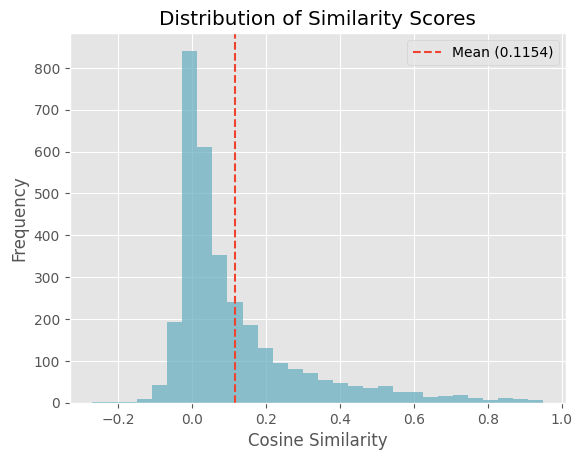

In [9]:
# Plot histogram of similarity scores
plt.style.use('ggplot')
plt.figure()
plt.hist(all_prediction_cos_sims, color='#63acbe', bins=30, alpha=0.7)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

# Calculate mean and standard deviation of similarity scores
mean_similarity = np.mean(all_prediction_cos_sims)
std_similarity = np.std(all_prediction_cos_sims)

# Plot vertical lines for the confidence interval
plt.axvline(mean_similarity, color='#ee442f', linestyle='--', label=f'Mean ({mean_similarity:.4f})')

# Add legend
plt.legend()

# Show plot
plt.show()

In [10]:
from scipy import stats

# Calculate 95% confidence interval for mean of similarity scores
confidence_level = 0.95
confidence_interval = stats.t.interval(
    confidence_level,
    df=len(all_prediction_cos_sims) - 1,
    loc=np.mean(all_prediction_cos_sims),
    scale=stats.sem(all_prediction_cos_sims)
)

print(f"Mean: {mean_similarity}")
print(f"95% Confidence Interval for Mean: {confidence_interval}")

Mean: 0.11537292538171733
95% Confidence Interval for Mean: (0.10915571914575643, 0.12159013161767822)


In [22]:
from scipy.stats import shapiro, ttest_1samp, wilcoxon

# Perform the Shapiro-Wilk test to test for normality of distribution
stat, p_value = shapiro(all_prediction_cos_sims)
if p_value < 0.001: 
    p_value_str = " < 0.001"
else:
    p_value_str = f": {p_value:.3f}"
print(f"Shapiro-Wilk Test Statistic: {stat:.4f} | p-value{p_value_str}")

# Interpret the results with significance level 0.05 and population mean of 0.5
alpha = 0.05  
hyp_mean = 0.5 # 0

if p_value > alpha:
    print("\tThe data is normally distributed. You can use a t-test.")
    test_stat, p_value_test = ttest_1samp(all_prediction_cos_sims, popmean=hyp_mean)
    print(f"t-statistic: {test_stat:.4f} | p-value: {p_value_test}")
else:
    print("  --> The data is not normally distributed. Use the Wilcoxon signed-rank test instead of a t-test.")
    wilcoxon_stat, p_value_test = wilcoxon(all_prediction_cos_sims - hyp_mean, alternative="greater") 
        # The wilcoxon test statistic represents the sum of the ranks of the differences above zero
    print(f"Wilcoxon signed-rank test statistic: {wilcoxon_stat} | p-value: {p_value_test}")

Shapiro-Wilk Test Statistic: 0.7800 | p-value < 0.001
  --> The data is not normally distributed. Use the Wilcoxon signed-rank test instead of a t-test.
Wilcoxon signed-rank test statistic: 60747.0 | p-value: 1.0
